<a href="https://colab.research.google.com/github/Taewan0508/portfolio_optimization/blob/main/portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2432376241.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start = "2020-01-01", end= "2025-01-01")['Close']
[*********************100%***********************]  3 of 3 completed


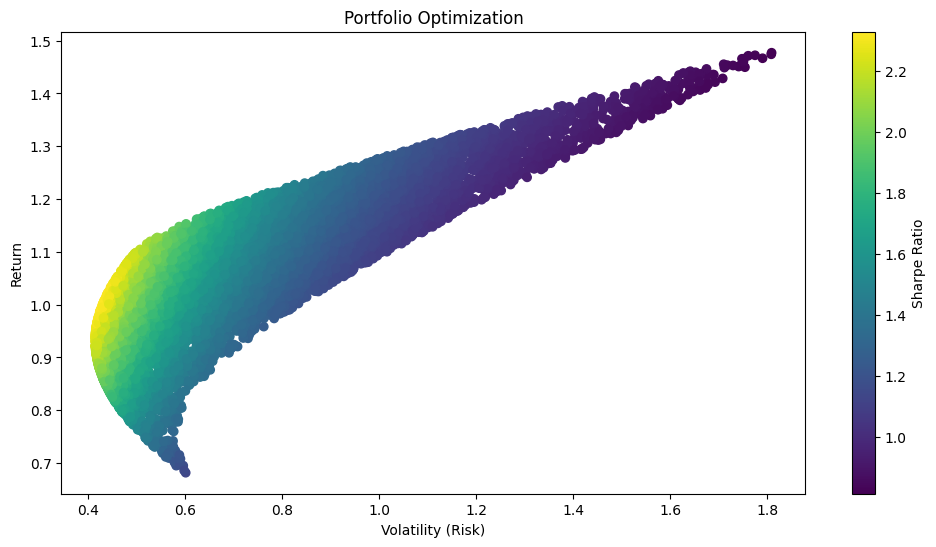

Best weights: {'NVDA': np.float64(0.71), 'TSLA': np.float64(0.09), 'RR': np.float64(0.2)}


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

#Download multiple stocks and datasets
tickers = ["NVDA", "TSLA", "RR"]
data = yf.download(tickers, start = "2020-01-01", end= "2025-01-01")['Close']


#Compute daily returns
returns = data.pct_change().dropna()

#Simulate random portfolios
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(tickers)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
  weights = np.random.random(len(tickers))
  weights /= np.sum(weights)

  all_weights[i, :] = weights
  ret_arr[i] = np.sum(returns.mean() * weights) *252 #annualized returns
  vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))) #annualized volatility
  sharpe_arr[i] = ret_arr[i] / vol_arr[i]

#Plot the Efficient Frontier
plt.figure(figsize=(12, 6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Portfolio Optimization')
plt.show()

#Find the best Portfolio
max_sr_idx = sharpe_arr.argmax()
best_weights = all_weights[max_sr_idx]
print(f"Best weights: {dict(zip(tickers, np.round(best_weights, 2)))}")